In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from qutip import *
import laser

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser

# Equation of Motion for the Density Matrix of the Cavity Field 

## Introduction

For $\rho_{nm}$, we have

$$
\begin{aligned}
\dot{\rho}_{nm} =
&- \frac{M_{nm}A}{1 + N_{nm}B/A} \rho_{nm} + \frac{\sqrt{nm}A}{1 + N_{n-1,m-1}B/A} \rho_{n-1,m-1} \\
&- \frac{C}{2}(n+m)\rho_{nm} + C\sqrt{(n+1)(m+1)} \rho_{n+1, m+1}
\end{aligned}
$$

where
$$
\begin{aligned}
A &= \frac{2r_a g^2}{\gamma^2},\\
B &= \frac{4g^2}{\gamma^2} A,\\
M_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{8A},\\
N_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{16A}.
\end{aligned}
$$

In particular, for diagonal elements, we have

$$
\begin{aligned}
\dot{p}(n) =
&- \frac{(n+1)A}{1 + (n+1)B/A} p(n) + \frac{nA}{1 + nB/A} p(n-1) \\
&- Cnp(n) + C(n+1)p(n+1)
\end{aligned}
$$

## Linear approximation ($B = 0 $)

In the steady state ($\dot{p}(n)=0$), the equation of motion reduces to

$$
-A(n+1)p(n) + Anp(n-1) - C np(n) + C(n+1)p(n+1) = 0
$$

The detailed balance condition implies that

$$
\begin{aligned}
Anp(n-1) &- C np(n) = 0\\
A(n+1)p(n) &- C(n+1)p(n+1) = 0
\end{aligned}
$$

The solution is clearly

$$
p(n) = \left(1 - \frac{A}{C} \right) \left( \frac{A}{C} \right)^n, ~~~ A < C. 
$$

By defining an effective temperature $T$ by

$$
\exp\left( - \frac{\hbar \nu}{k_B T} \right) = \frac{A}{C},
$$

we could obtain

$$
p(n) = \left[1 - \exp\left(-\frac{\hbar\nu}{k_B T}\right) \right] \exp\left(-\frac{n\hbar\nu}{k_B T} \right).
$$

So below the threshold, the steady-state solution is essentially that of a black-body cavity.

**A numerical example**

As $B = \frac{4g^2}{\gamma^2} A \to 0$, the interaction strenght must be much smaller than the atom decay rate, i.e. $g \ll \gamma$. Another condition should be satisfied is $A < C$. Let's choose the following parameters.

- Cavity frequency: $\omega_c = 2\pi$
- Atom frequency: $\omega_a = 2\pi$
- Coupling strength: $g = 0.0001 \times 2\pi$
- atom dissipation rate: $\gamma = 0.01$
- cavity dissipation rate: $C = 0.01$
- atom pump rate: $r_a = 0.50$
- average thermal photon: $n_{\rm th} = 0$

In [26]:
# parameters
w_c = 2.0 * np.pi
w_a = 2.0 * np.pi
g = 0.0001 * 2 * np.pi

gamma = 0.01
kappa = 0.01
ra = 0.9

# initial cavity state
N_max = 25
n_list = np.arange(N_max)
init_psi = fock(N_max, 0)

# list of time for ode
t_list = 0.2 * 2 * np.pi / w_c * np.arange(10000)

In [46]:
laser_below = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa)

In [47]:
laser_below.get_atom_cavity_args()

{'g': 0.0006283185307179586,
 'gamma': 0.01,
 'kapa': 0.01,
 'ra': 0.9,
 'w_a': 6.283185307179586,
 'w_c': 6.283185307179586}

In [48]:
laser_below.get_abc()

{'A': 0.007106115168784337, 'B': 0.00011221527287117076, 'C': 0.01}

In [49]:
%time laser_below.pn_evolve(init_psi, N_max, t_list)

Wall time: 2.31 s


TypeError: 'AxesSubplot' object is not iterable

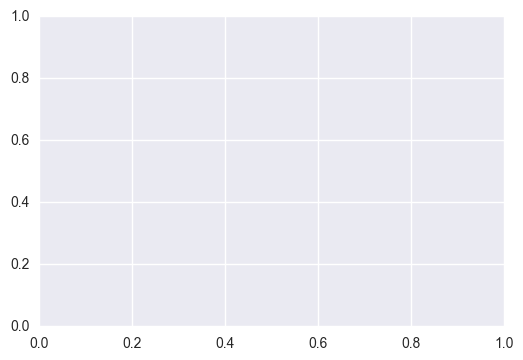

In [50]:
fig, ax = laser_below.plot_field_vs_time()

In [31]:
laser_below_pns = laser_below.get_pns()
%time laser_below_aver_n = [sum(pn * n_list) for pn in laser_below_pns]

Wall time: 96 ms


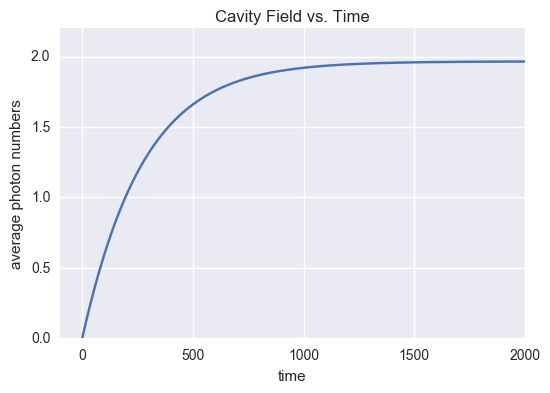

In [35]:
plt.figure(figsize=(6,4))
plt.plot(t_list, laser_below_aver_n)
plt.xlim(-100)
plt.ylim(0, 2.2)
plt.xlabel("time")
plt.ylabel("average photon numbers")
plt.title("Cavity Field vs. Time");

### 11.2.2 Far above threshold ($A \gg C$)

In the steady state ($\dot{p}(n)=0$), the equation of motion reduces to

$$
-\frac{A^2}{B}p(n) + \frac{A^2}{B}p(n-1) - C np(n) + C(n+1)p(n+1) = 0.
$$

Detailed balance condition is

$$
\frac{A^2}{B} p(n-1) - C n p(n) = 0
$$

The normalized solution of these euqaitons is 

$$
p(n) = e^{- \langle n \rangle} \frac{- \langle n \rangle ^ n}{n!},
$$

with

$$
\langle n \rangle = \frac{A^2}{BC}.
$$

Thus the photon statistics of the lasre far above threshold are given by a Poisson distribution which is a characteristic of a coherent state.

### i. a vacuum state as the initial state

The initial state is a vaccuum $\psi_0 = \lvert 0 \rangle$.

As $A \gg C$. Let's choose the following parameters.

- Cavity frequency: $\omega_c = 2\pi$
- Atom frequency: $\omega_a = 2\pi$
- Coupling strength: $g = 0.01 \times 2\pi$
- atom dissipation rate: $\gamma = 0.01$
- cavity dissipation rate: $C = 0.01$
- atom pump rate: $r_a = 0.50$
- average thermal photon: $n_{\rm th} = 0$

**Set parameters**

In [204]:
# parameters
w_c = 2.0 * np.pi
w_a = 2.0 * np.pi
g = 0.01 * 2 * np.pi

gamma = 0.01
kappa = 0.01
ra = 0.4

# initial cavity state
N_max = 80
n_list = np.arange(N_max)
init_psi = fock(N_max, 0)

# list of time for ode
t_list = 0.02 * 2 * np.pi / w_c * np.arange(40000)

**Create laser and solve the evolution equations**

In [205]:
laser1 = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa)

In [206]:
%time result2 = laser1.pn_evolve(init_psi, N_max, t_list)

Wall time: 13.6 s


**Plot average photon numbers vs. time**

In [207]:
laser1_pns = laser1.get_pns()
%time aver_n = [sum(pn * n_list) for pn in laser1_pns]

Wall time: 796 ms


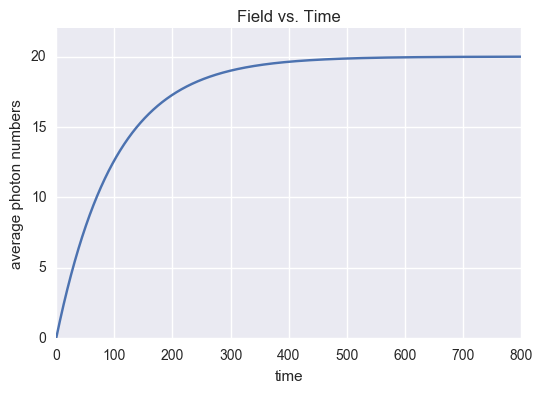

In [208]:
plt.figure(figsize=(6,4))
plt.plot(t_list, aver_n)
plt.ylim(0, 22)
plt.xlabel("time")
plt.ylabel("average photon numbers")
plt.title("Field vs. Time");

**Properties for the steady state**

In [213]:
laser1_s_pn, laser1_s_rho = laser1.get_steady_state() 

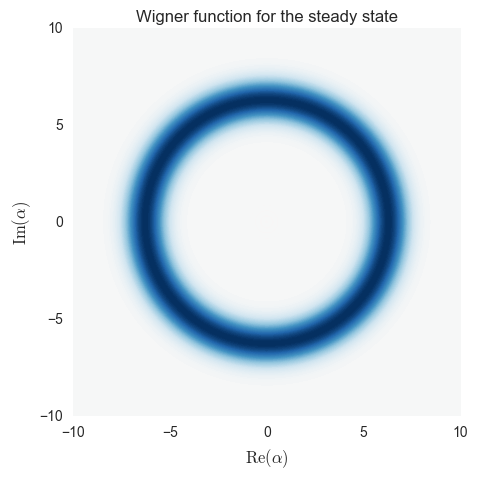

In [239]:
plot_wigner(laser1_s_rho, alpha_max=10, figsize=(4,4))
plt.title("Wigner function for the steady state");

**Compare numberical/analytical photon statistics for the steady states**

In [211]:
ne = laser1.A**2/laser1.kappa/laser1.B
pn_analytical = [np.exp(-ne) * ne**n / np.math.factorial(n) for n in n_list]

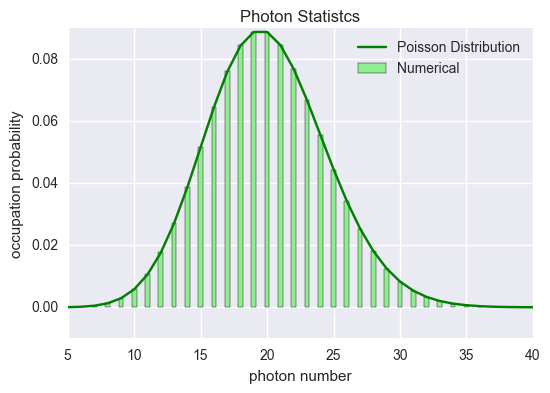

In [216]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(n_list, laser1_s_pn, color='lightgreen', 
       width=0.35, align='center', label="Numerical")
ax.plot(n_list, pn_analytical, color='green', 
        label="Poisson Distribution")
plt.xlabel("photon number")
plt.ylabel("occupation probability")
plt.title("Photon Statistcs")
plt.legend()
plt.xlim(5, 40);

**Plot entropy vs. time**

In [217]:
laser1_rhos = laser1.get_rhos()

In [218]:
%time laser1_entropy = np.array([entropy_vn(rho, 2) for rho in laser1_rhos])

Wall time: 38.4 s


In [225]:
sum(laser1_spn)

0.99999999999999756

In [229]:
entropy_max = - sum(pn_analytical * np.log2(pn_analytical))
entropy_max

4.2018873940012158

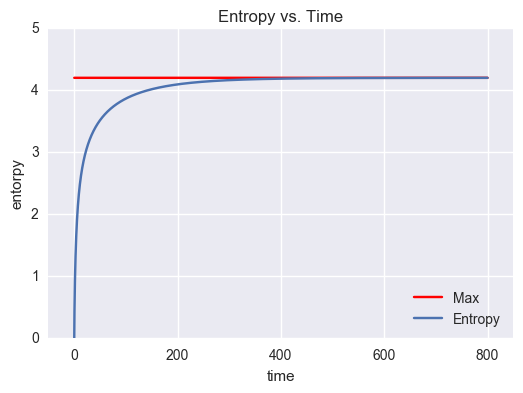

In [238]:
plt.plot(t_list, [entropy_max] * len(t_list), color='red', label="Max")
plt.plot(t_list, laser1_entropy, label="Entropy")
plt.ylim(0, 5)
plt.xlim(-50, 850)
plt.xlabel("time")
plt.ylabel("entorpy")
plt.title("Entropy vs. Time")
plt.legend(loc=4)

### ii. a squeezed vacuum as the initial state

The initial state is a vaccuum $\psi_0 = S(\xi = 0.1) \lvert 0 \rangle$.

As $A \gg C$. Let's choose the following parameters.

- Cavity frequency: $\omega_c = 2\pi$
- Atom frequency: $\omega_a = 2\pi$
- Coupling strength: $g = 0.01 \times 2\pi$
- atom dissipation rate: $\gamma = 0.01$
- cavity dissipation rate: $C = 0.01$
- atom pump rate: $r_a = 0.50$
- average thermal photon: $n_{\rm th} = 0$

**Set parameters**

In [266]:
# parameters
w_c = 2.0 * np.pi
w_a = 2.0 * np.pi
g = 0.01 * 2 * np.pi

gamma = 0.01
kappa = 0.01
ra = 0.4

# initial cavity state
N_max = 80
n_list = np.arange(N_max)

s_op = squeeze(N_max, 1)
vac = fock(N_max, 0)
init_rho = ket2dm(s_op * vac)

# list of time for ode
t_list = 0.2 * 2 * np.pi / w_c * np.arange(4000)

**Properties of the initial state**

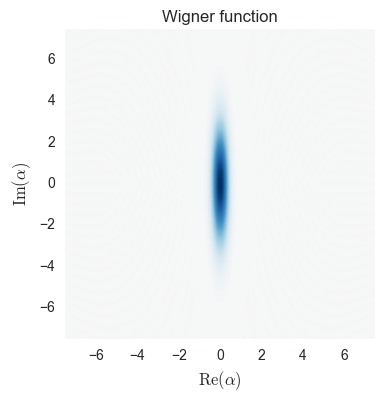

In [267]:
plot_wigner(init_rho, figsize=(4,4), projection='2d');

**Create the laser and solve the evolution equations**

In [268]:
laser2 = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa)

In [269]:
%time laser2.rho_evolve(init_rho, N_max, t_list)

Wall time: 14min 33s


**Field vs. Time**

In [270]:
laser2_pns = laser2.get_pns()
%time aver_n = [sum(pn * n_list) for pn in laser2_pns]

Wall time: 90 ms


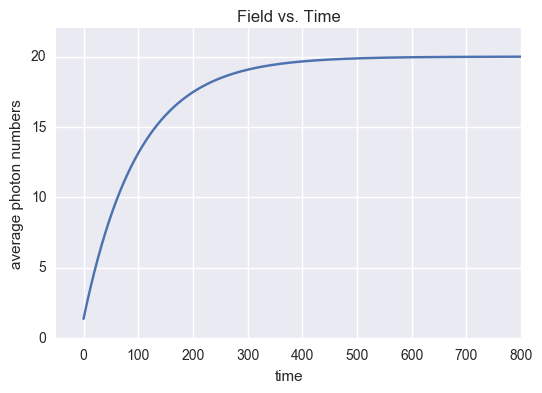

In [272]:
plt.figure(figsize=(6,4))
plt.plot(t_list, aver_n)
plt.xlim(-50, 800)
plt.ylim(0, 22)
plt.xlabel("time")
plt.ylabel("average photon numbers")
plt.title("Field vs. Time");

**Properties for the steady state**

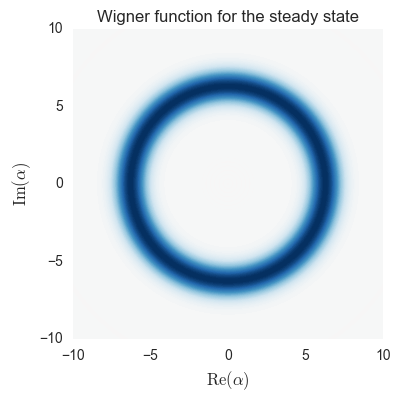

In [274]:
laser2_s_pn, laser2_s_rho = laser2.get_steady_state()
plot_wigner(laser2_s_rho, alpha_max=10, figsize=(4,4))
plt.title("Wigner function for the steady state");

**Plot entropy vs. time**

In [275]:
laser2_rhos = laser2.get_rhos()

%time laser2_entropy = np.array([entropy_vn(rho, 2) for rho in laser2_rhos])

Wall time: 5.58 s


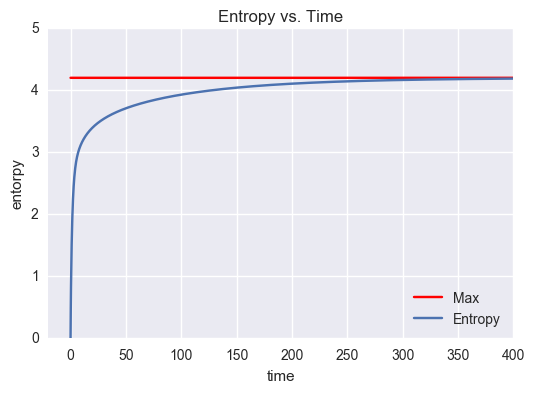

In [278]:
plt.plot(t_list, [entropy_max] * len(t_list), color='red', label="Max")
plt.plot(t_list, laser2_entropy, label="Entropy")
plt.ylim(0, 5)
plt.xlim(-20, 400)
plt.xlabel("time")
plt.ylabel("entorpy")
plt.title("Entropy vs. Time")
plt.legend(loc=4)